<a href="https://colab.research.google.com/github/a-gasior/DSA/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = 'drive/My Drive/Data Solution Analyst Case Study/Data/cleaned_data/'

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [14]:
x_discrete = pd.read_csv(data_path+'X_discrete.csv')
x_continuous = pd.read_csv(data_path+'X_continuous.csv')
y = pd.read_csv(data_path+'y_all.csv')
x_continuous.drop('duration',axis=1,inplace=True)
X_whole = pd.concat([x_continuous,x_discrete],axis=1)
y_actual = y.loc[:,'y'].values
X = X_whole.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.33, random_state = 7)
# create train and test set.
# specifying random state=7 makes the same data the test data every time to reduce bias

In [117]:
someVar = KFold(n_splits=10,shuffle=True)
someVar.get_n_splits(X_train)

recalls = []
# accuracies = []
for num_estimators in range(1,50):
  # this_fold_acc = 0
  this_fold_recall = 0
  for train_idx, test_idx in someVar.split(X_train):
    X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
    clf = RandomForestClassifier(n_estimators=num_estimators)
    clf.fit(X_train_fold,y_train_fold)
    # print(clf.score(X_test_fold,y_test_fold))
    y_predict = clf.predict(X_test_fold)
    recall = f1_score(y_test_fold,y_predict)
    # this_fold_acc += clf.score(X_test_fold,y_test_fold)
    this_fold_recall += recall
  # accuracies.append((num_estimators,this_fold_acc/10))
  recalls.append((num_estimators,recall/10))

In [118]:
# accuracies
recalls

[(1, 0.03465045592705167),
 (2, 0.029175475687103592),
 (3, 0.04161073825503355),
 (4, 0.033928571428571426),
 (5, 0.03713733075435202),
 (6, 0.034666666666666665),
 (7, 0.03817427385892116),
 (8, 0.03860369609856262),
 (9, 0.03822393822393823),
 (10, 0.041276595744680844),
 (11, 0.03951612903225806),
 (12, 0.037815126050420166),
 (13, 0.03984526112185687),
 (14, 0.036929460580912864),
 (15, 0.041269841269841276),
 (16, 0.04288659793814433),
 (17, 0.04308943089430894),
 (18, 0.038493723849372385),
 (19, 0.04344422700587084),
 (20, 0.04035874439461884),
 (21, 0.041796875),
 (22, 0.04122448979591836),
 (23, 0.045401174168297455),
 (24, 0.03657587548638132),
 (25, 0.038910505836575876),
 (26, 0.04452975047984645),
 (27, 0.04227005870841487),
 (28, 0.04076190476190476),
 (29, 0.03857442348008385),
 (30, 0.038966202783300194),
 (31, 0.0434108527131783),
 (32, 0.041791044776119404),
 (33, 0.04107883817427386),
 (34, 0.037096774193548385),
 (35, 0.04327485380116959),
 (36, 0.03644067796610169

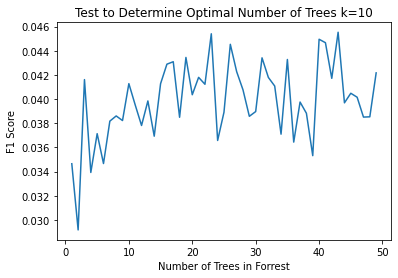

In [119]:
num_trees, acc = zip(*recalls)
plt.plot(num_trees,acc)
plt.xlabel('Number of Trees in Forrest')
plt.ylabel('F1 Score')
plt.title('Test to Determine Optimal Number of Trees k=10')
plt.savefig('drive/My Drive/Data Solution Analyst Case Study/images/f1_det_trees.png')

In [121]:
from operator import itemgetter
optimal_num_trees = max(recalls,key=itemgetter(1))[0]
print('optimal num trees: '+str(optimal_num_trees))
clf = RandomForestClassifier(n_estimators=optimal_num_trees)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

optimal num trees: 43
0.8911939969101743


In [122]:
y_predict = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:,1]

In [123]:
precision = precision_score(y_test,y_predict)
print('precision: %f' % precision)
recall = recall_score(y_test,y_predict)
print('recall: %f' % recall)
f1 = f1_score(y_test,y_predict)
print('F1 Score: %f' % f1)
roc_value = roc_auc_score(y_test,y_probs)
print('ROC AUC: %f' % roc_value)
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

precision: 0.505535
recall: 0.276210
F1 Score: 0.357236
ROC AUC: 0.764348
[[11703   402]
 [ 1077   411]]


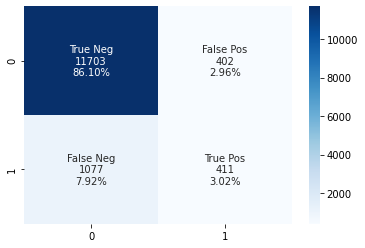

In [124]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
pp_confusion = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
fig = pp_confusion.get_figure()
fig.savefig('drive/My Drive/Data Solution Analyst Case Study/images/ConfusionMatrix_f1optimaized.png')

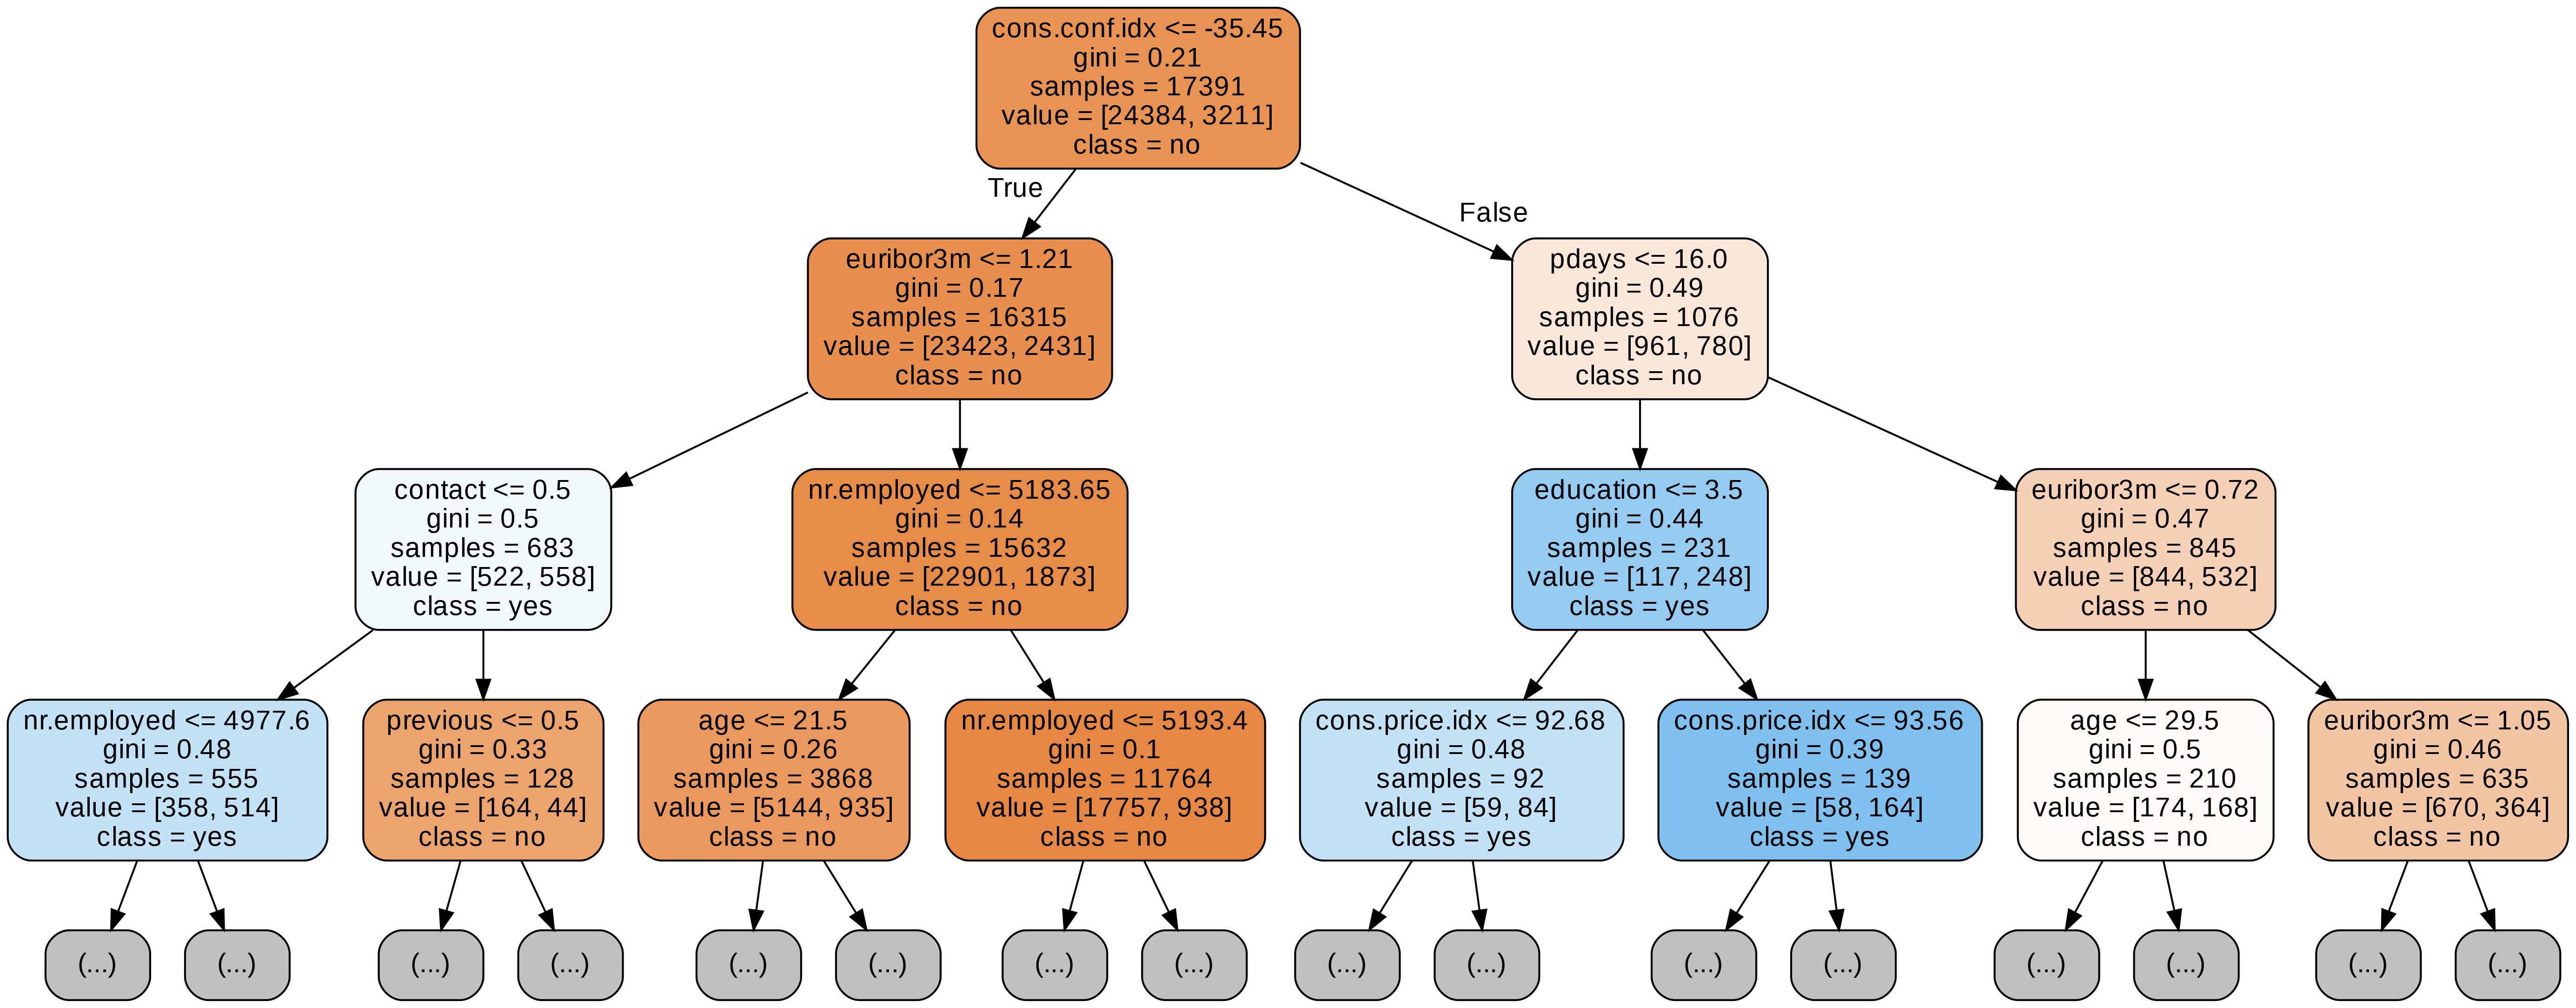

In [133]:
estimator = clf.estimators_[0]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_whole.columns,
                class_names = ['no','yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=3)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])
from IPython.display import Image
Image(filename = 'tree.png')

In [129]:
def calc_brier(row):
  return (row['NewModelPrediction'] - row['y_actual'])**2

In [127]:
new_df = pd.DataFrame(y_test,columns=['y_actual'])
new_df['NewModelPrediction'] = y_probs

In [131]:
new_df['brierScore'] = new_df.apply(lambda row: calc_brier(row), axis=1)

In [132]:
(new_df['brierScore'].sum())/len(new_df)

0.08470764821175011